In [84]:
import pandas as pd
import numpy as np

# 示例股市数据 DataFrame (假设数据已经准备好)
data = {
    'Open': [100, 98, 95, 97, 102],
    'High': [105, 99, 97, 100, 106],
    'Low': [95, 94, 90, 95, 100],
    'Close': [98, 96, 94, 99, 104]
}

df = pd.DataFrame(data)

# 定义形态检测函数
def detect_hammer(row):
    # 锤子线：长下影线，短实体，上影线非常短
    body = abs(row['Close'] - row['Open'])  # 实体长度
    candle_range = row['High'] - row['Low']  # K线的总范围
    lower_shadow = min(row['Open'], row['Close']) - row['Low']  # 下影线长度
    upper_shadow = row['High'] - max(row['Open'], row['Close'])  # 上影线长度

    # 锤子线条件
    return (
        lower_shadow > 2 * body and  # 下影线至少是实体的两倍
        body < 0.3 * candle_range and  # 实体不超过整个K线范围的30%
        upper_shadow < 0.1 * candle_range  # 上影线非常短（小于整个K线范围的10%）
    )

# 在数据中应用这些条件
df['Hammer'] = df.apply(detect_hammer, axis=1)

# 输出检测结果
print(df)


   Open  High  Low  Close  Hammer
0   100   105   95     98   False
1    98    99   94     96   False
2    95    97   90     94   False
3    97   100   95     99   False
4   102   106  100    104   False


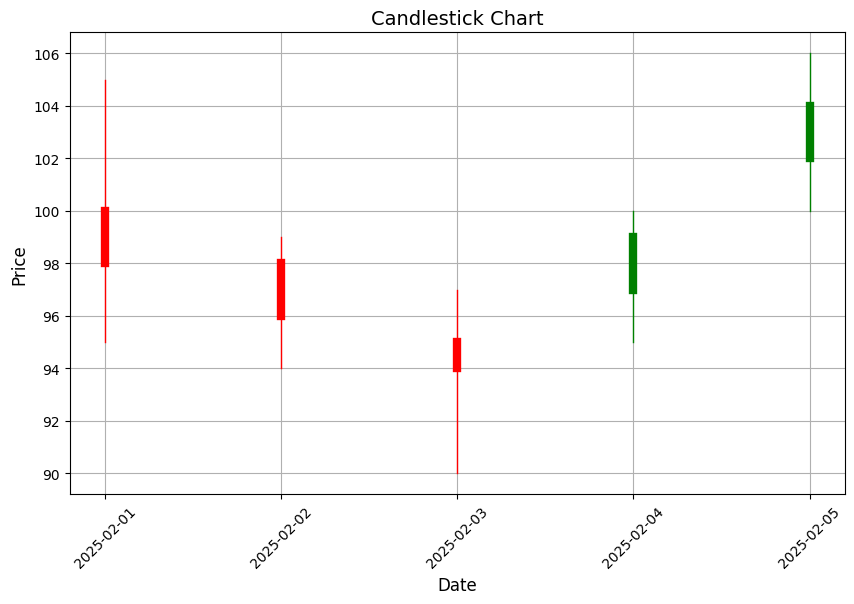

In [1]:
# 查看K线形态
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example stock data DataFrame
data = {
    'Date': ['2025-02-01', '2025-02-02', '2025-02-03', '2025-02-04', '2025-02-05'],
    'Open': [100, 98, 95, 97, 102],
    'High': [105, 99, 97, 100, 106],
    'Low': [95, 94, 90, 95, 100],
    'Close': [98, 96, 94, 99, 104]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Function to plot the candlestick chart
def plot_candlestick(df):
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Plot each candlestick
    for i in range(len(df)):
        row = df.iloc[i]
        color = 'green' if row['Close'] > row['Open'] else 'red'
        
        ax.plot([row['StockName'], row['StockName']], [row['Low'], row['High']], color=color, lw=1)  # High-Low line
        ax.plot([row['StockName'], row['StockName']], [row['Open'], row['Close']], color=color, lw=6)  # Open-Close box

    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # ax.xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.title('Candlestick Chart', fontsize=14)
    plt.xlabel('StockName', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()

plot_candlestick(df)


In [100]:
import sqlite3
import pandas as pd

# 连接到 SQLite 数据库
conn = sqlite3.connect('stock_data.db')  # 替换为你的数据库文件路径

# 执行 SQL 查询并将结果直接加载到 DataFrame 中
df = pd.read_sql_query('SELECT * FROM stock_data', conn,
                       dtype={'StockCode': str})  # 替换为你的 SQL 查询和表名

# 关闭连接
conn.close()

In [101]:
df.rename(columns={'LatestPrice': 'Close'}, inplace=True)
data = df[['StockCode', 'StockName', 'Close', 'High', 'Low','Open']].copy()
# 处理异常数据
data.replace(' —', np.nan, inplace=True)
data.dropna(subset=['Close', 'High', 'Low', 'Open'], inplace=True)
# 判断锤头线
data['Hammer'] = data.apply(detect_hammer, axis=1)

C:\Users\BXDM\AppData\Local\Temp\ipykernel_5172\1535793933.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(' —', np.nan, inplace=True)


In [103]:
# 筛选出现探底信号的股票
filtered_df = data[data['Hammer']]
filtered_df

,StockCode,StockName,Close,High,Low,Open,Hammer
21,603496,恒为科技,38.10,38.10,33.96,37.88,True
23,605100,华丰股份,25.32,25.32,25.01,25.32,True
26,603037,凯众股份,19.38,19.38,19.00,19.38,True
33,002582,好想你,11.80,11.80,11.18,11.74,True
34,605066,天正电气,8.06,8.06,7.88,8.06,True
35,002298,中电兴发,7.84,7.84,6.65,7.49,True
328,600201,生物股份,6.47,6.48,6.35,6.44,True
694,603276,恒兴新材,14.65,14.81,14.27,14.78,True
697,002795,永和智控,5.57,5.64,5.37,5.62,True
859,603277,银都股份,28.67,28.98,27.63,28.98,True


In [98]:
var = data[data['StockCode'] == '603517']
var

,StockCode,StockName,Close,High,Low,Open,Hammer,Doji
141,603517,绝味食品,16.16,16.99,15.97,16.25,False,True


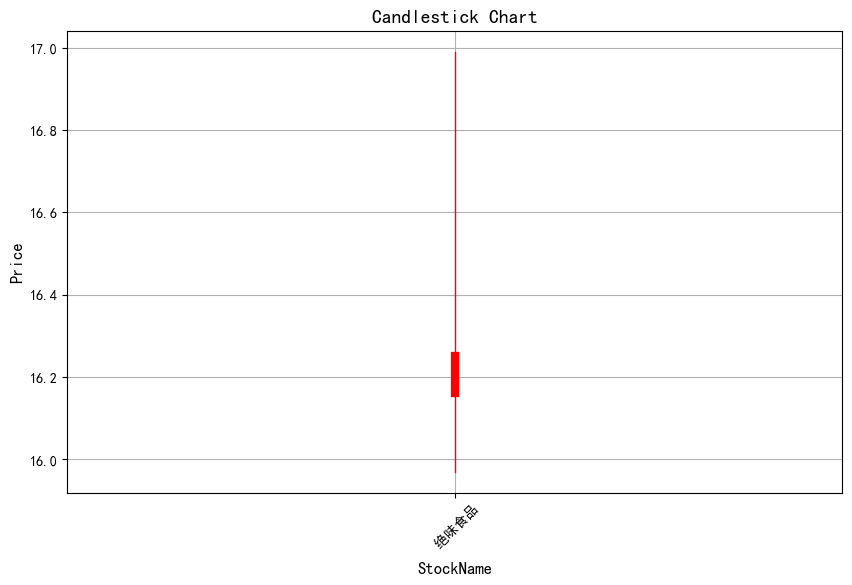

In [99]:
plot_candlestick(var)

In [94]:
def plot_candlestick(df):
    fig, ax = plt.subplots(figsize=(10,6))
    # 设置中文显示
    plt.rcParams['font.sans-serif'] = ['SimHei']    # 中文字体设置-黑体
    plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像是负号'-'显示为方块的问题
    # Plot each candlestick
    for i in range(len(df)):
        row = df.iloc[i]
        color = 'green' if row['Close'] > row['Open'] else 'red'
        
        ax.plot([row['StockName'], row['StockName']], [row['Low'], row['High']], color=color, lw=1)  # High-Low line
        ax.plot([row['StockName'], row['StockName']], [row['Open'], row['Close']], color=color, lw=6)  # Open-Close box

    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # ax.xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.title('Candlestick Chart', fontsize=14)
    plt.xlabel('StockName', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()
    # plt.savefig(r'C:\Users\BXDM\Desktop\candlestick.png', dpi=600)